In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

<img src = '../ggplot2_twovariable.png'/>

# Text

**`geom_text()`**: Text geoms are useful for labeling plots. They can be used by themselves as scatterplots or in cobination with other geoms, for example, for labeling points or for annotating the height of bars. `geom_text()` adds only text to the plot.  
**`geom_label()`** draws a rectangle behind the text, making it easier to read.

```r
geom_label(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  parse = FALSE,
  nudge_x = 0,
  nudge_y = 0,
  label.padding = unit(0.25, "lines"),
  label.r = unit(0.15, "lines"),
  label.size = 0.25,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_text(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  parse = FALSE,
  nudge_x = 0,
  nudge_y = 0,
  check_overlap = FALSE,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`parse`	
If TRUE, the labels will be parsed into expressions and displayed as described in ?plotmath.

`nudge_x`, `nudge_y`	
Horizontal and vertical adjustment to nudge labels by. Useful for offsetting text from points, particularly on discrete scales. Cannot be jointly specified with position.

`label.padding`	
Amount of padding around label. Defaults to 0.25 lines.

`label.r`	
Radius of rounded corners. Defaults to 0.15 lines.

`label.size`	
Size of label border, in mm.

`check_overlap`	
If TRUE, text that overlaps previous text in the same layer will not be plotted. check_overlap happens at draw time and in the order of the data. Therefore data should be arranged by the label column before calling geom_label() or geom_text().

**Details**  
Note that when you resize a plot, text labels stay the same size, even though the size of the plot area changes. This happens because the "width" and "height" of a text element are 0. Obviously, text labels do have height and width, but they are physical units, not data units. For the same reason, stacking and dodging text will not work by default, and axis limits are not automatically expanded to include all text.

`geom_text()` and `geom_label()` add labels for each row in the data, even if coordinates x, y are set to single values in the call to `geom_label()` or `geom_text()`. To add labels at specified points use `annotate()` with `annotate(geom = "text", ...)` or `annotate(geom = "label", ...)`.

### Aesthetic

**`geom_text()`** understands the following aesthetics (required aesthetics are in bold):

* **x**

* **y**

* label

* alpha

* angle

* colour

* family

* fontface

* group

* hjust

* lineheight

* size

* vjust

**`geom_label()`**
Currently `geom_label()` does not support the angle aesthetic and is considerably slower than `geom_text()`. The `fill` aesthetic controls the background colour of the label.

In [5]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [15]:
fig <- ggplot(iris, aes(Sepal.Length, Sepal.Width, label = Species, color = Species))


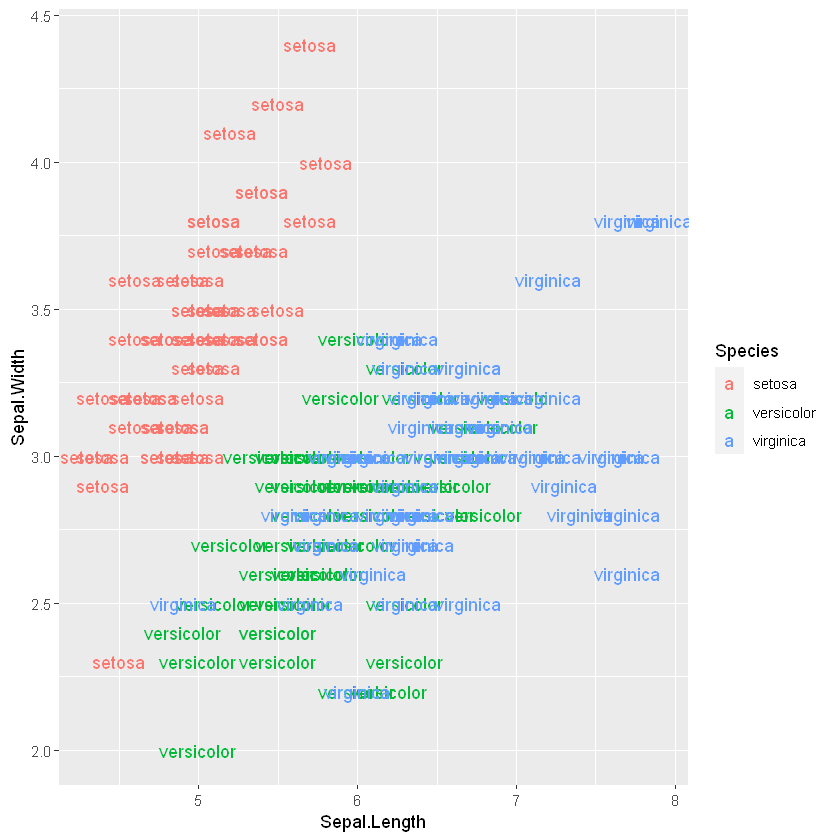

In [18]:
#default 
fig +
geom_text()

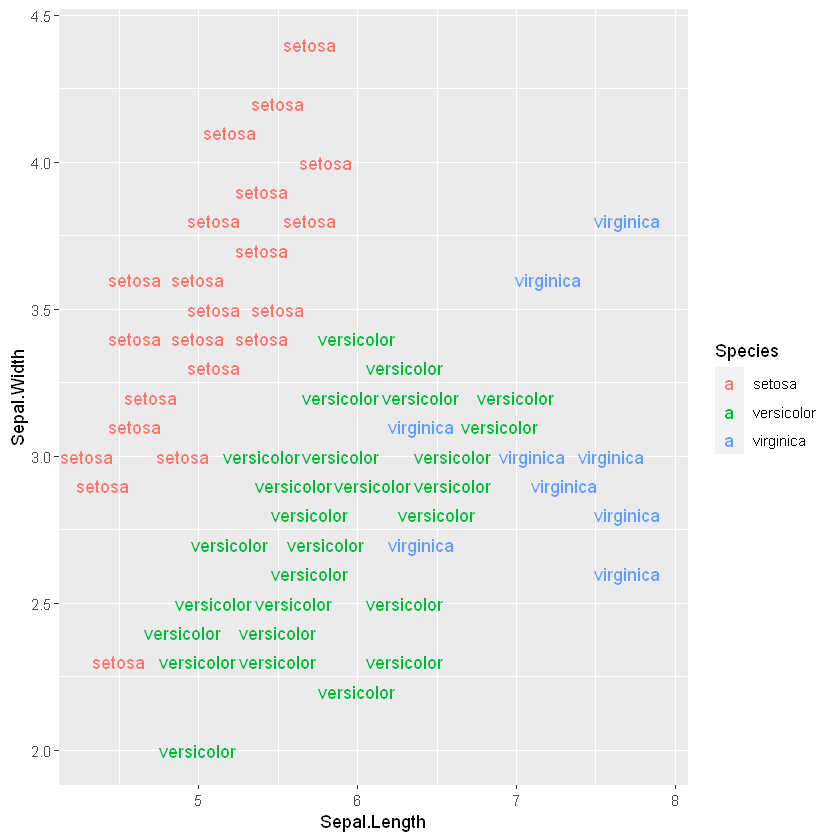

In [17]:
fig + 
geom_text(check_overlap = TRUE) #avoid overlapping

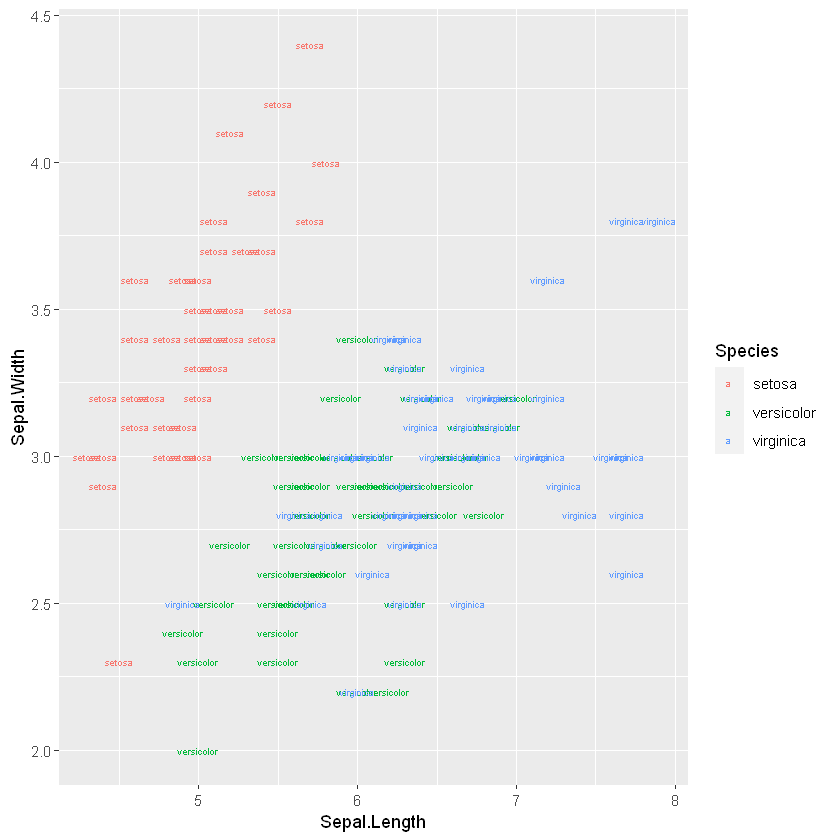

In [21]:
#changing size of label
fig +
geom_text(size = 2)

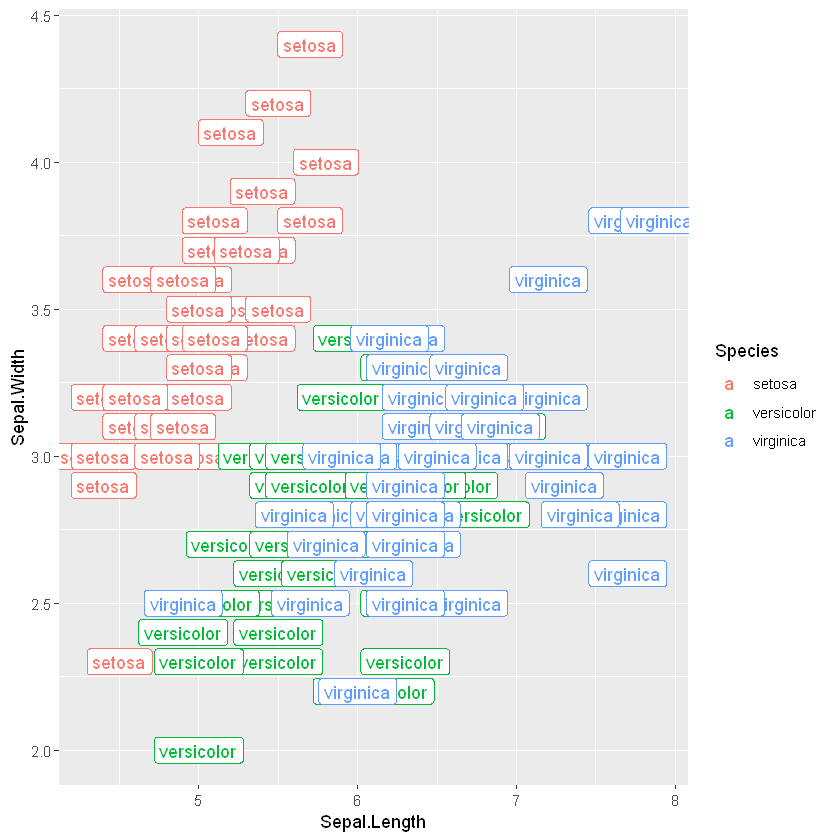

In [27]:
#labels with background
fig +
geom_label() 

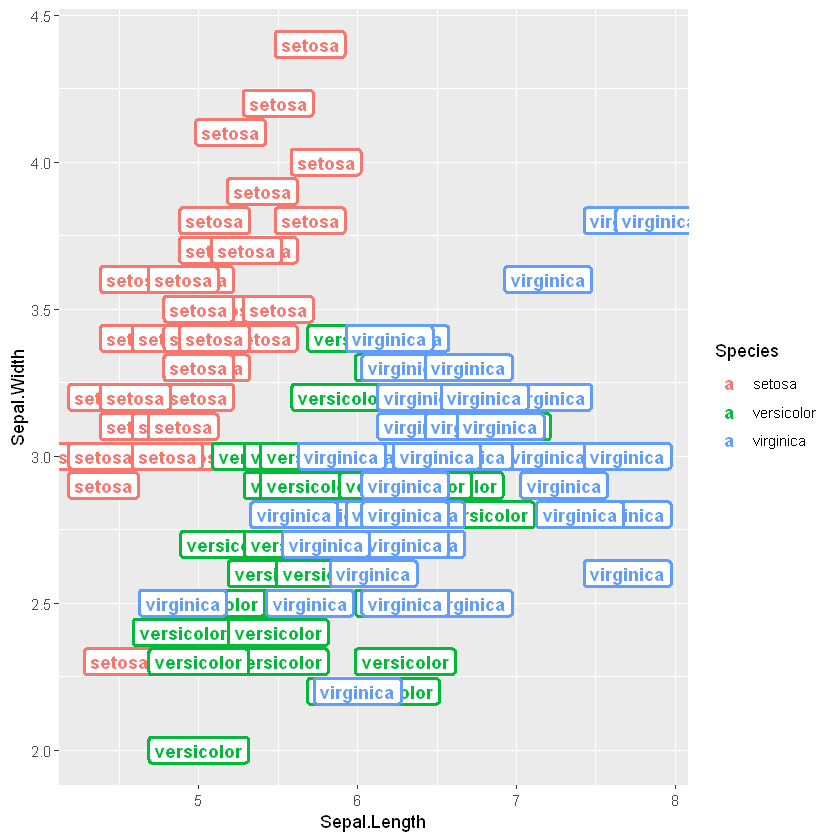

In [48]:
#customize label width background
fig +
geom_label(label.size = 1,   #the linewidth of label
           fontface = 'bold' #fontweight: bold 
           )

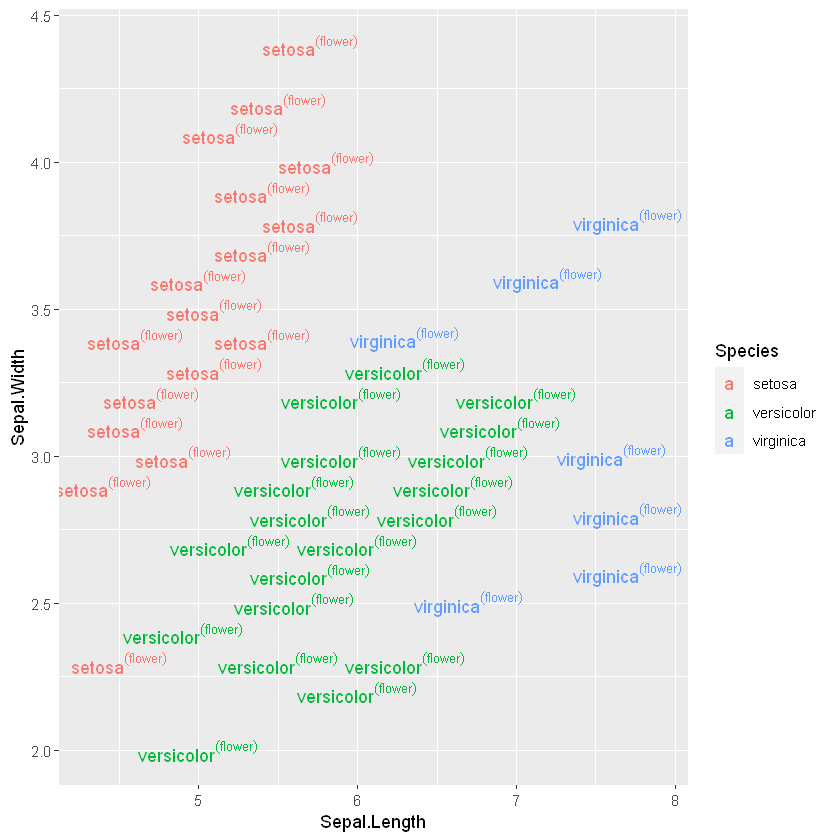

In [65]:
# You can display expressions by setting parse = TRUE.  The
# details of the display are described in ?plotmath, but note that
# geom_text uses strings, not expressions.
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
geom_text(aes(label = paste(Species, '^', '(flower)', sep = '')),
          parse = TRUE,         #alow mathematical expression
          check_overlap = TRUE  #reomve overlow
         )

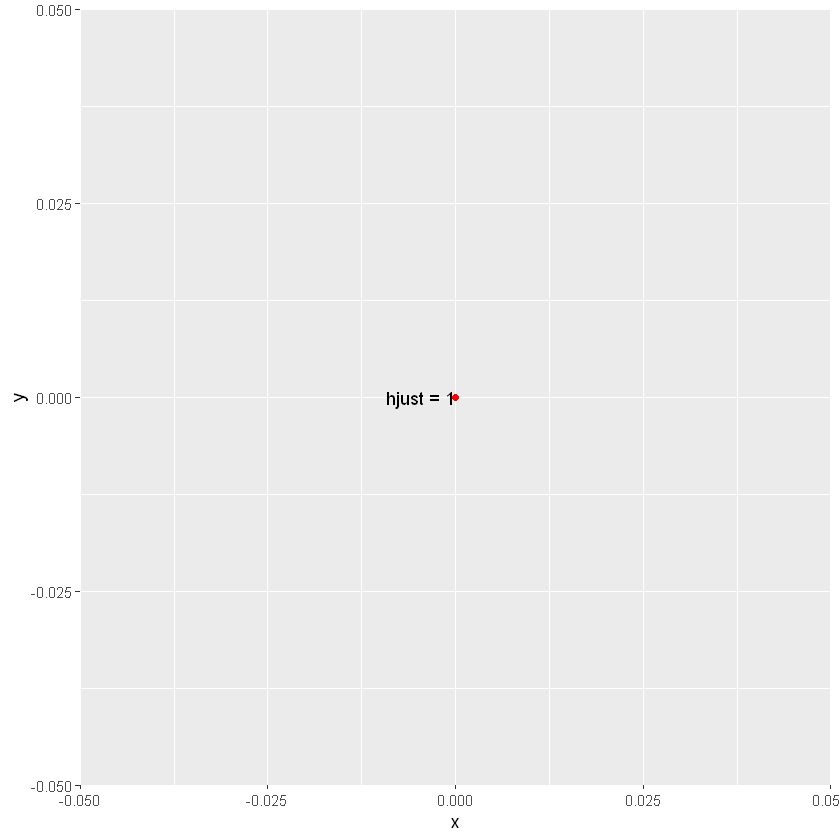

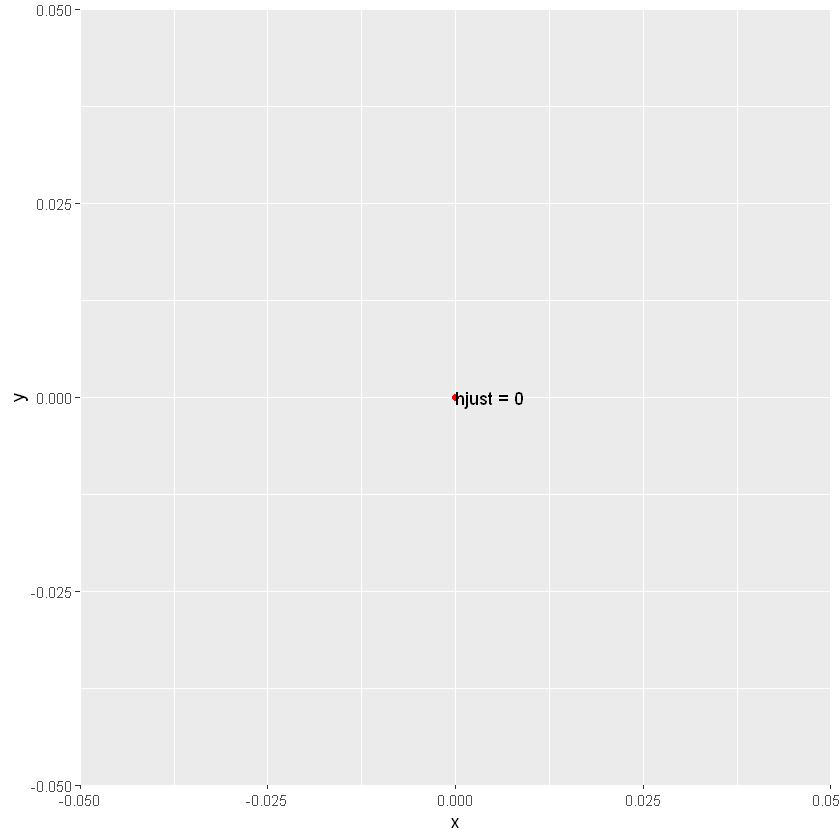

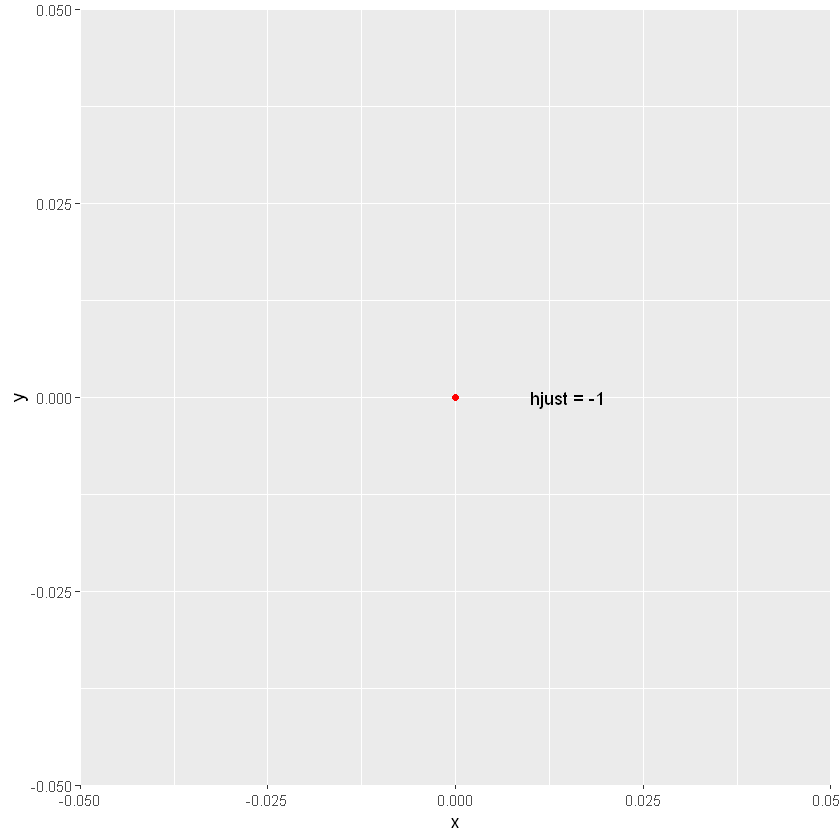

In [86]:
#Understanding hjust
#The same logic for vjust
point <- data.frame(x = 0, y = 0)
subplot <- ggplot(point, aes(x,y)) +geom_point(color = 'red') 

subplot + geom_text(label = 'hjust = 1', hjust = 1)  #put text to the left side of the red dot (initial position)
subplot + geom_text(label = 'hjust = 0', hjust = 0)  #put the center of text to the red dot (initial position)
subplot + geom_text(label = 'hjust = -1', hjust = -1)#put text to the right side of the red dot

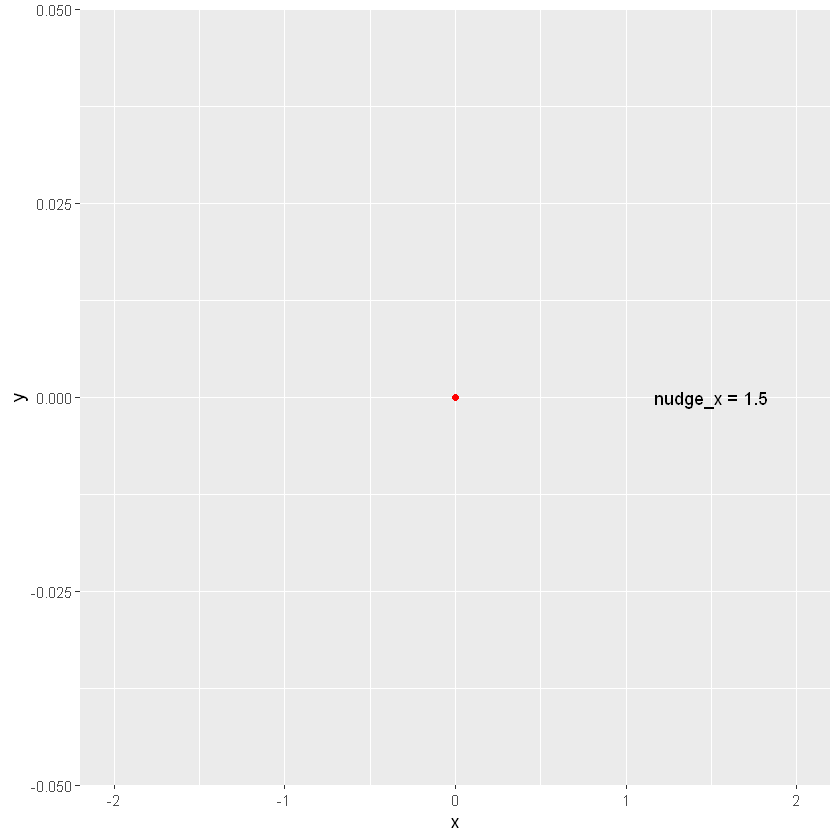

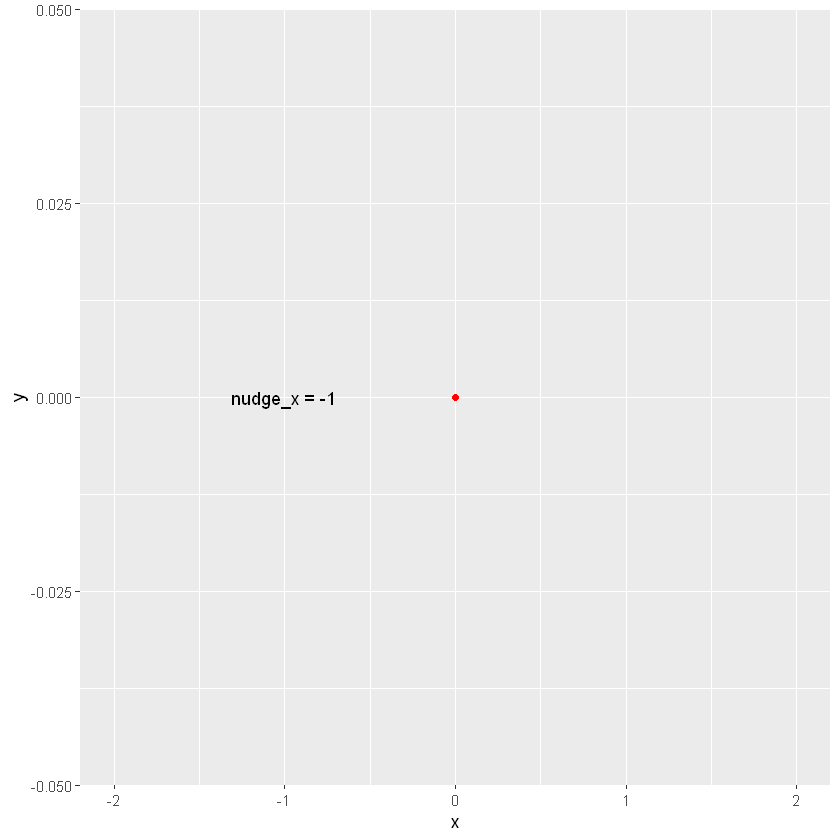

In [84]:
#understanding nudge_x
#nudge_x = 1.5: move text to the right 1.5 in data coordinate, starting from it's position (The red dot)
#nudge_x = -1: move text to the left 1 in data coordinate, starting from it's position     (The red dot)
#the same logic for nudge_y
subplot + geom_text(label = 'nudge_x = 1.5', nudge_x = 1.5) + xlim(-2, 2)
subplot + geom_text(label = 'nudge_x = -1', nudge_x = -1) + xlim(-2, 2)

<hr>

In [87]:
# Aligning labels and bars --------------------------------------------------
df <- data.frame(
  x = factor(c(1, 1, 2, 2)),
  y = c(1, 3, 2, 1),
  grp = c("a", "b", "a", "b")
)
df

x,y,grp
1,1,a
1,3,b
2,2,a
2,1,b


Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

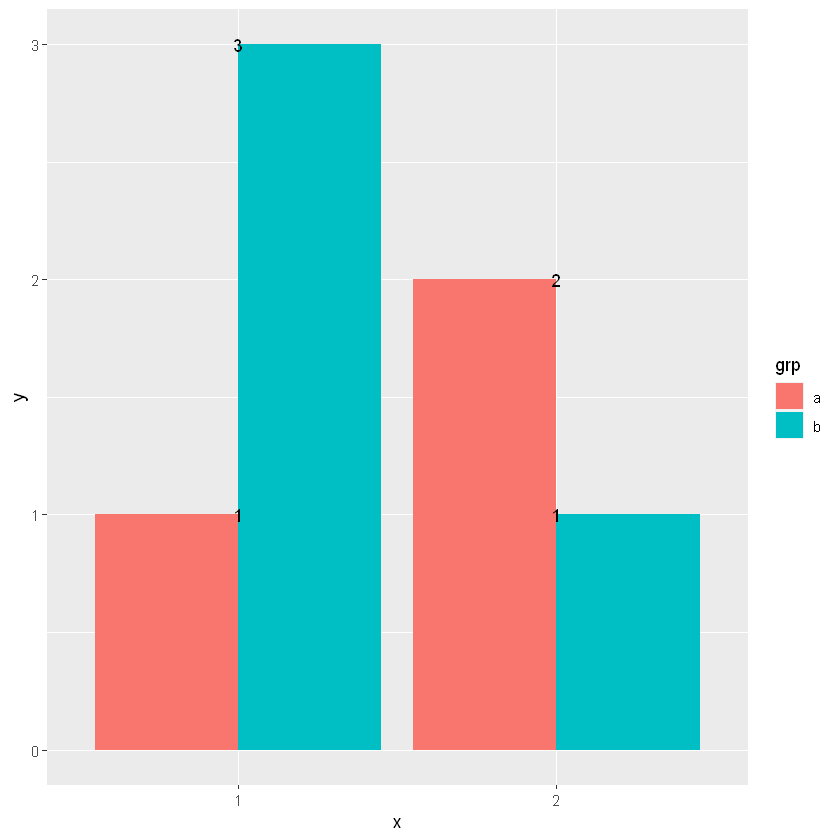

In [88]:
# ggplot2 doesn't know you want to give the labels the same virtual width
# as the bars:
ggplot(data = df, aes(x, y, group = grp)) +
geom_col(aes(fill = grp), position = "dodge") +
geom_text(aes(label = y), position = "dodge")

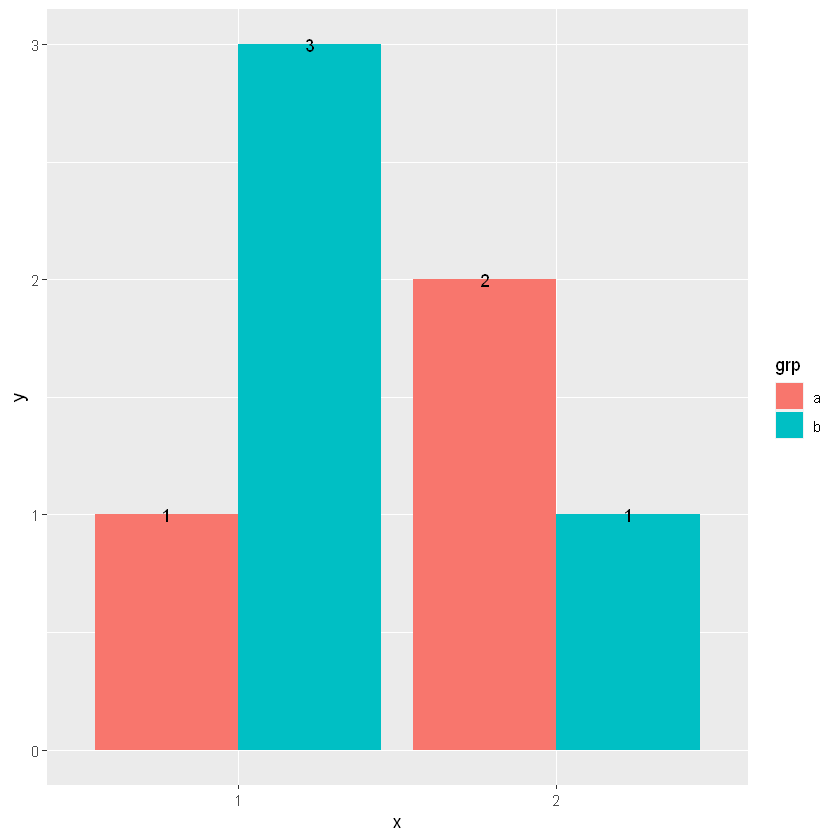

In [97]:
# So tell it:
ggplot(data = df, aes(x, y, group = grp)) +
geom_col(aes(fill = grp), position = "dodge") +
geom_text(aes(label = y), position = position_dodge(.9))

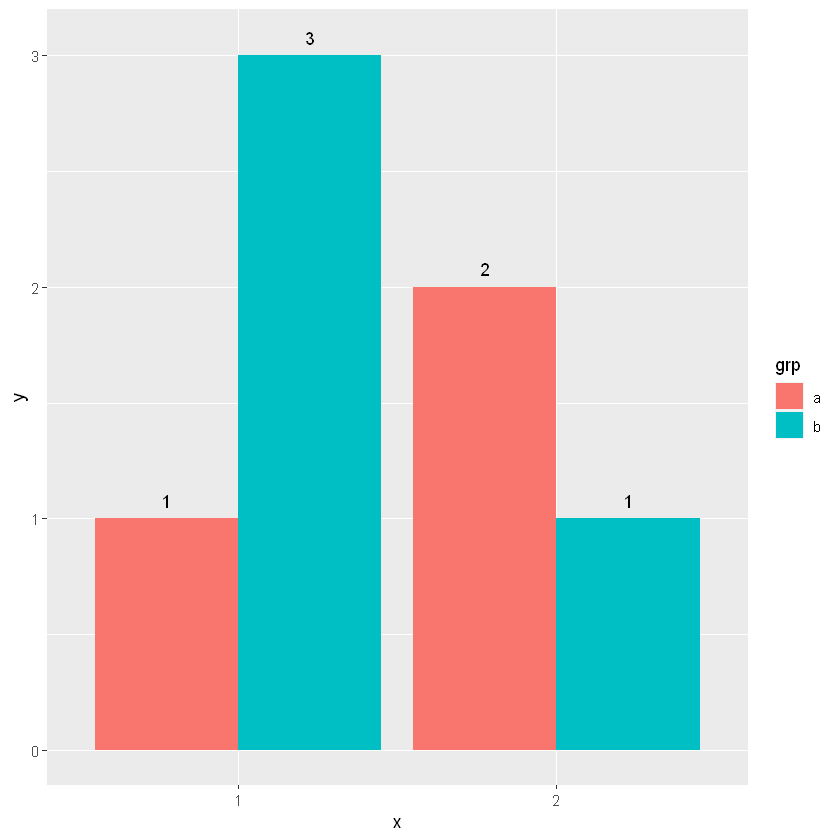

In [99]:
# Use you can't nudge and dodge text, so instead adjust the y position
ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp), position = "dodge") +
  geom_text(
    aes(label = y, y = y + 0.05),
    position = position_dodge(0.9),
    vjust = 0
  )

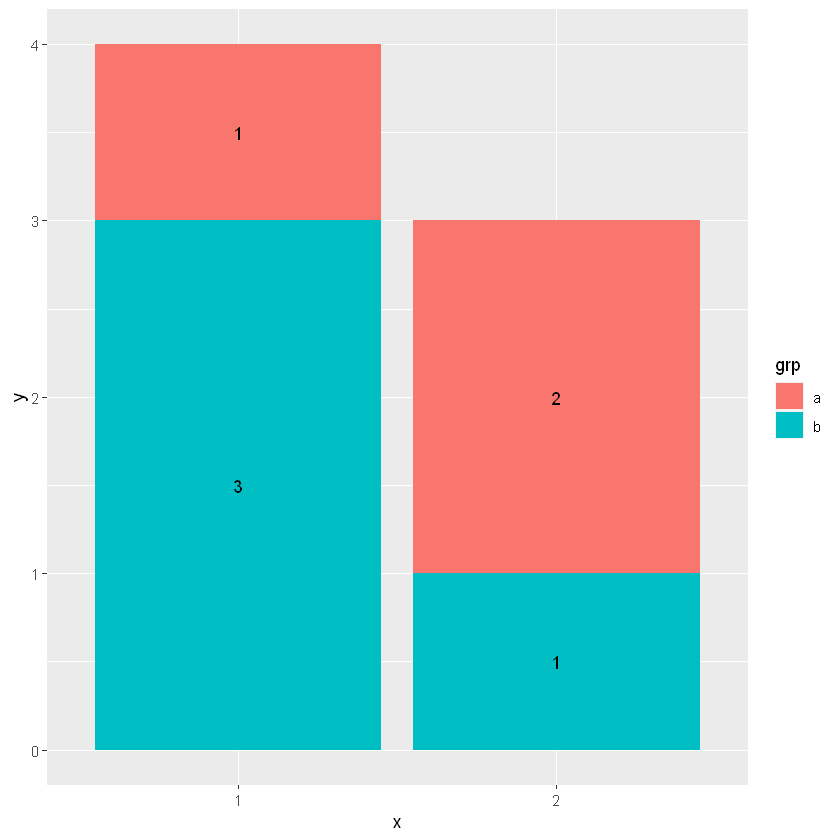

In [100]:
# To place text in the middle of each bar in a stacked barplot, you
# need to set the vjust parameter of position_stack()
ggplot(data = df, aes(x, y, group = grp)) +
 geom_col(aes(fill = grp)) +
 geom_text(aes(label = y), position = position_stack(vjust = 0.5))

<hr>

In [102]:
# Justification -------------------------------------------------------------
df <- data.frame(
  x = c(1, 1, 2, 2, 1.5),
  y = c(1, 2, 1, 2, 1.5),
  text = c("bottom-left", "bottom-right", "top-left", "top-right", "center")
)
df

x,y,text
1.0,1.0,bottom-left
1.0,2.0,bottom-right
2.0,1.0,top-left
2.0,2.0,top-right
1.5,1.5,center


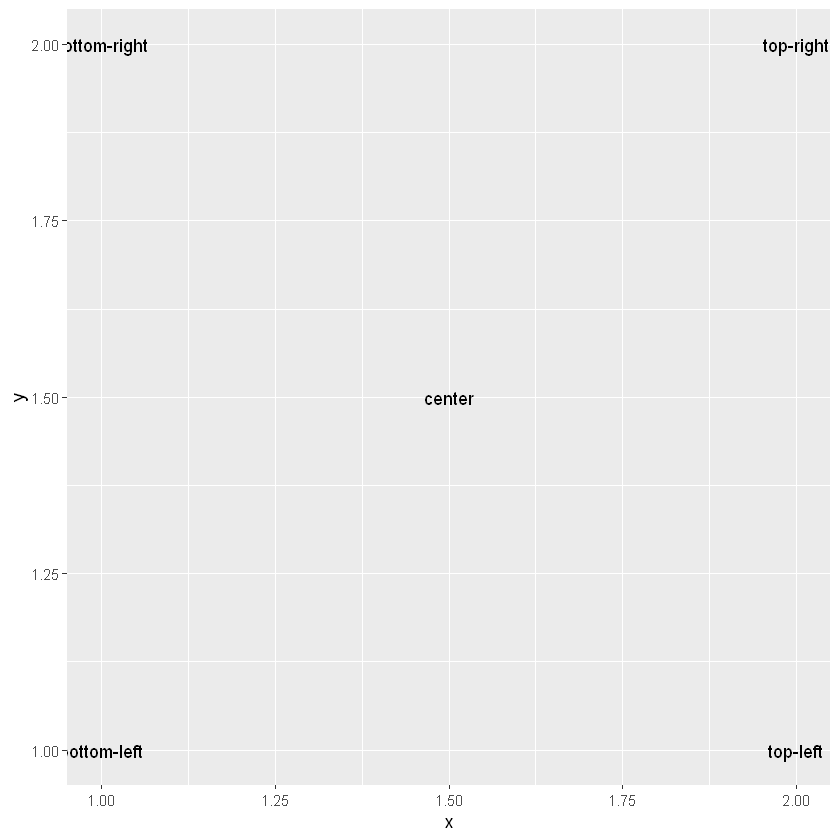

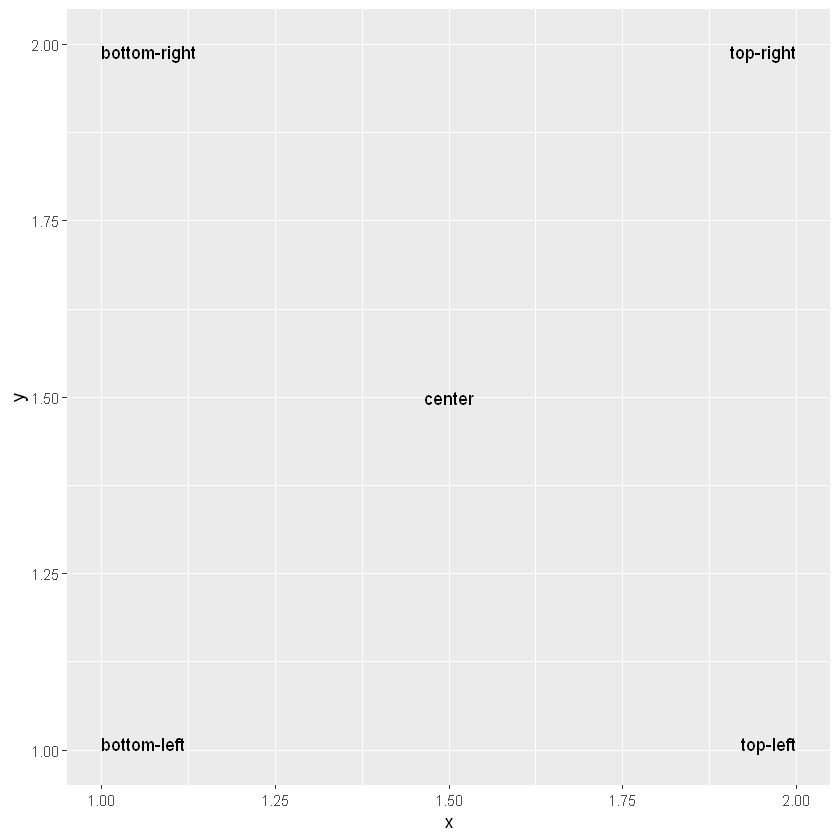

In [103]:
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text))
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text), vjust = "inward", hjust = "inward")

# Annotation

**`annotate`**: This function adds geoms to a plot, but unlike typical a geom function, the properties of the geoms are not mapped from variables of a data frame, but are instead passed in as vectors. This is useful for adding small annotations (such as text labels) or if you have your data in vectors, and for some reason don't want to put them in a data frame.

In [108]:
args(annotate)

function (geom, x = NULL, y = NULL, xmin = NULL, xmax = NULL, 
    ymin = NULL, ymax = NULL, xend = NULL, yend = NULL, ..., 
    na.rm = FALSE) 
NULL

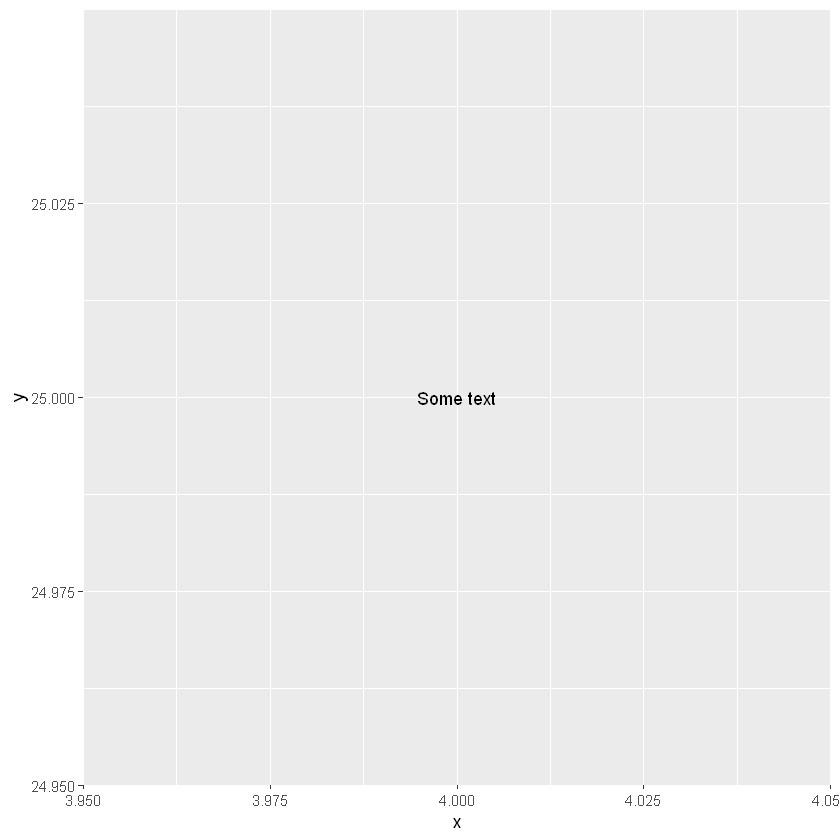

In [112]:
ggplot() + 
annotate("text", x = 4, y = 25, label = "Some text")

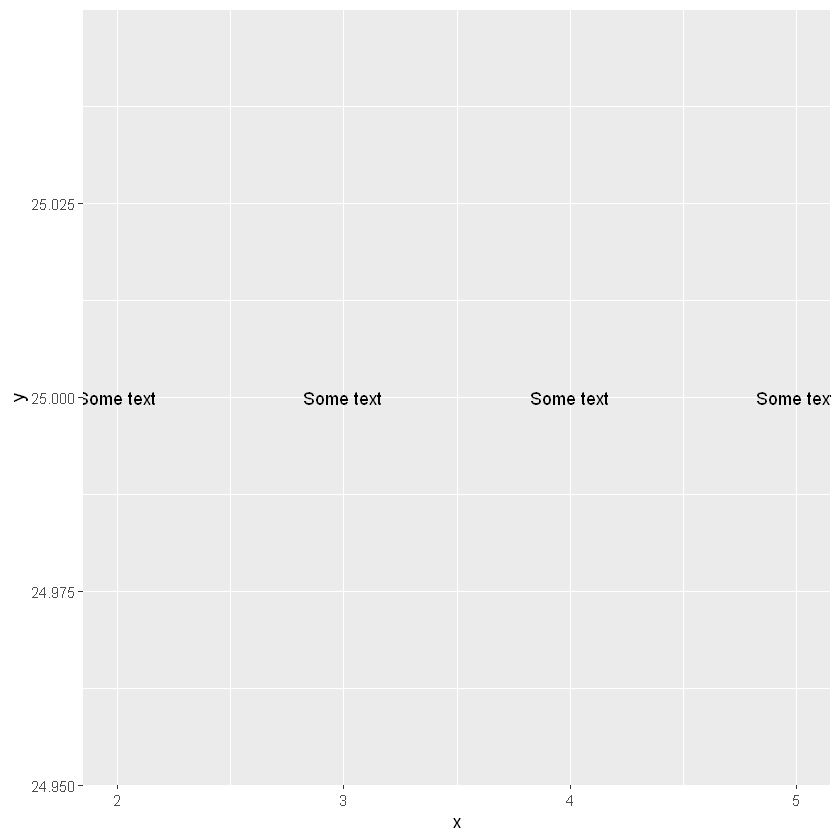

In [113]:
ggplot() + annotate("text", x = 2:5, y = 25, label = "Some text")

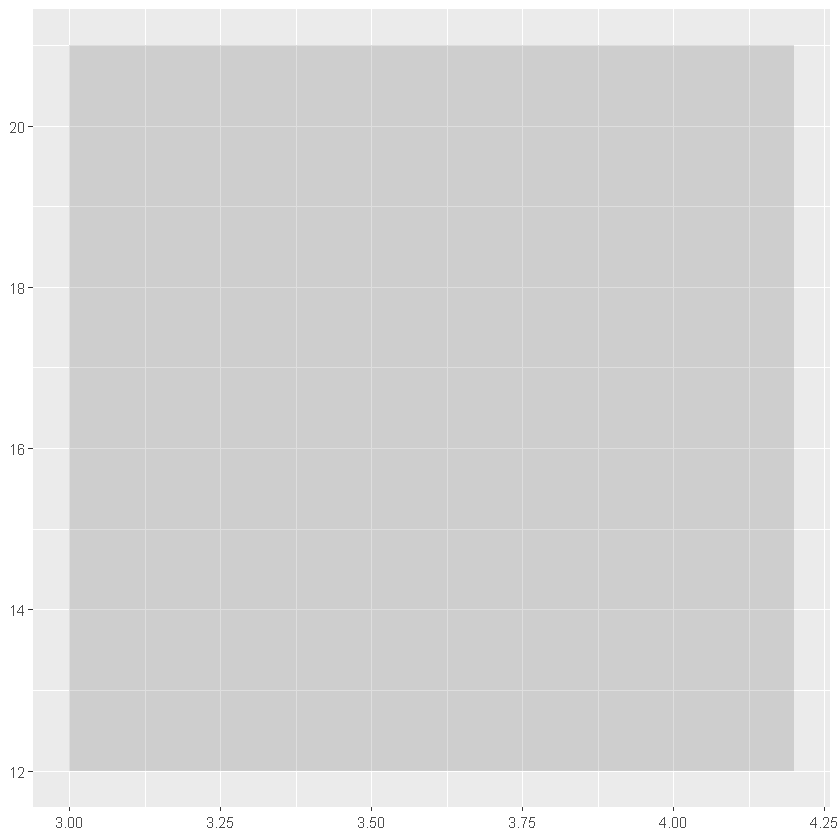

In [118]:
ggplot() + 
annotate("rect", xmin = 3, xmax = 4.2, ymin = 12, ymax = 21,alpha = .2)

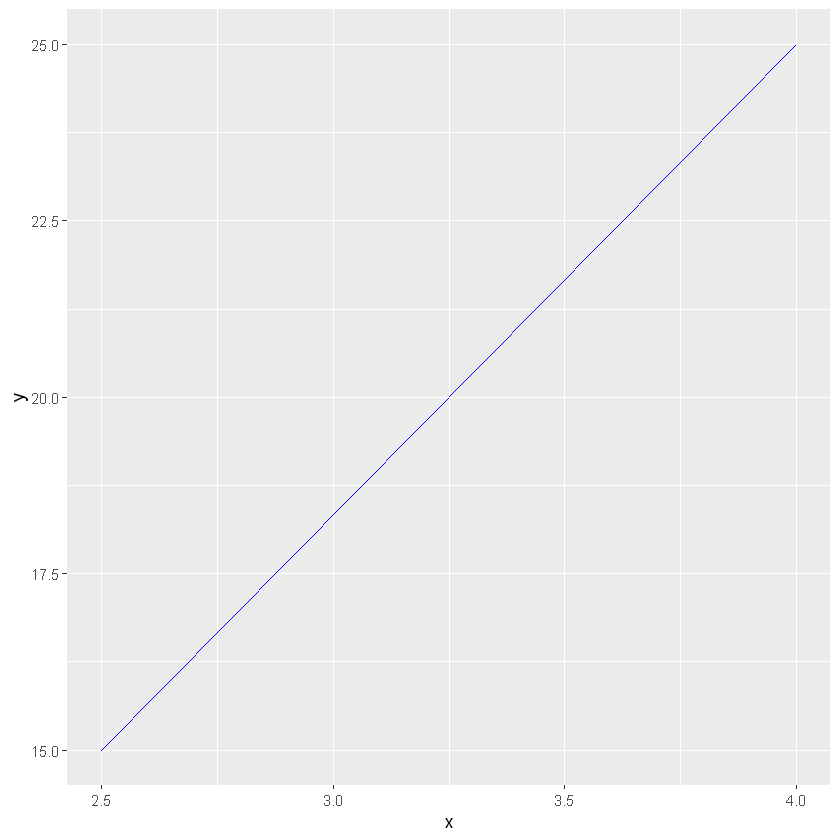

In [119]:
ggplot() + 
annotate("segment", x = 2.5, xend = 4, y = 15, yend = 25,colour = "blue")

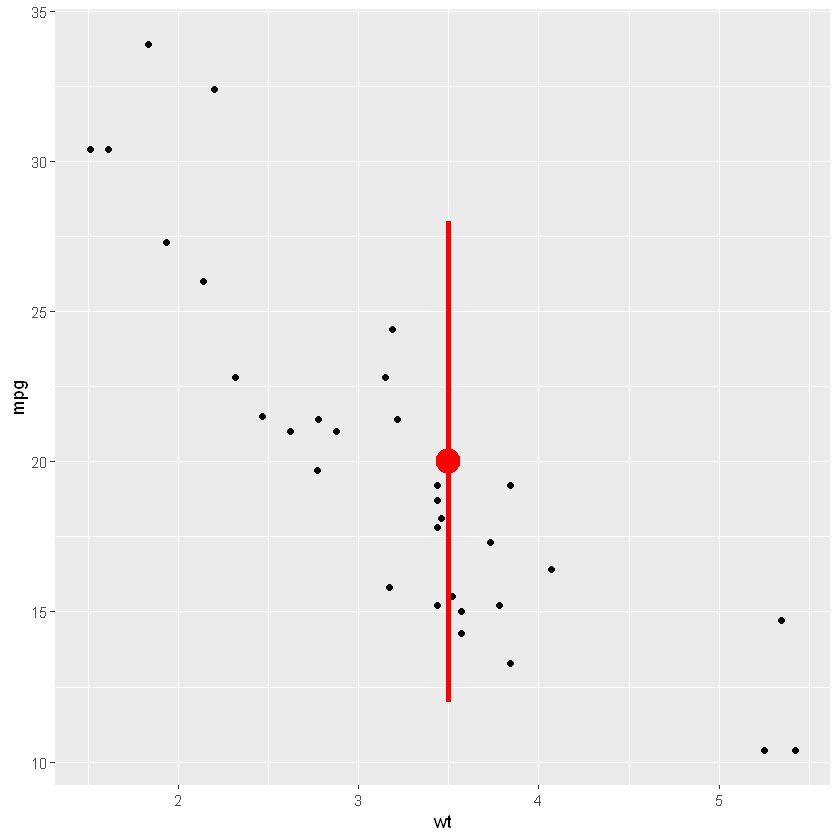

In [120]:
p + annotate("pointrange", x = 3.5, y = 20, ymin = 12, ymax = 28,
  colour = "red", size = 1.5)

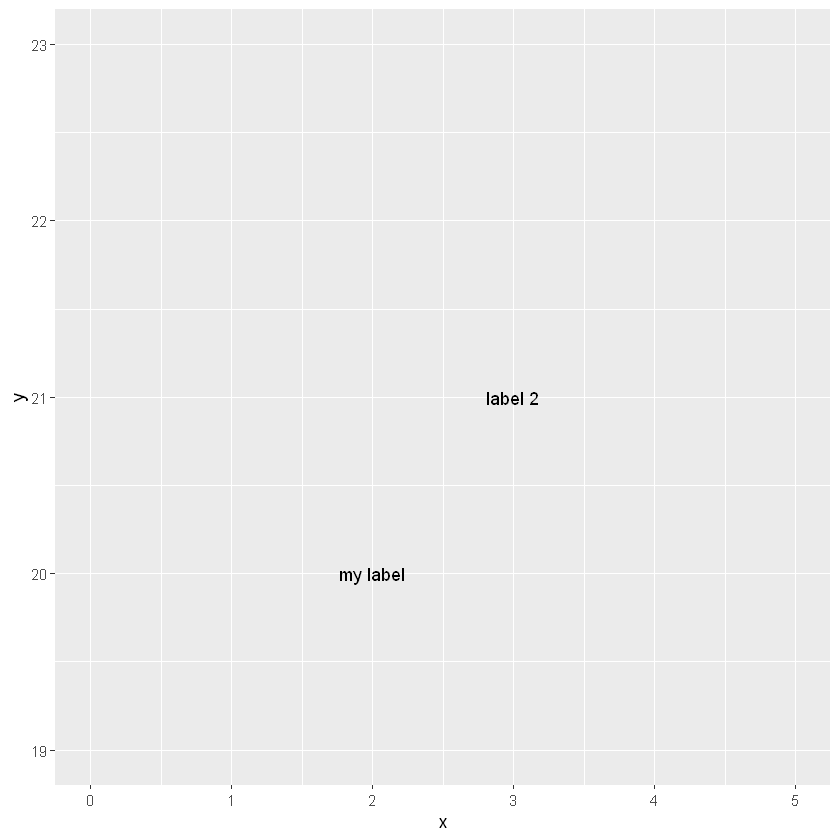

In [124]:
ggplot() +
annotate("text", x = 2:3, y = 20:21, label = c("my label", "label 2")) +
xlim(0, 5) +
ylim(19, 23)

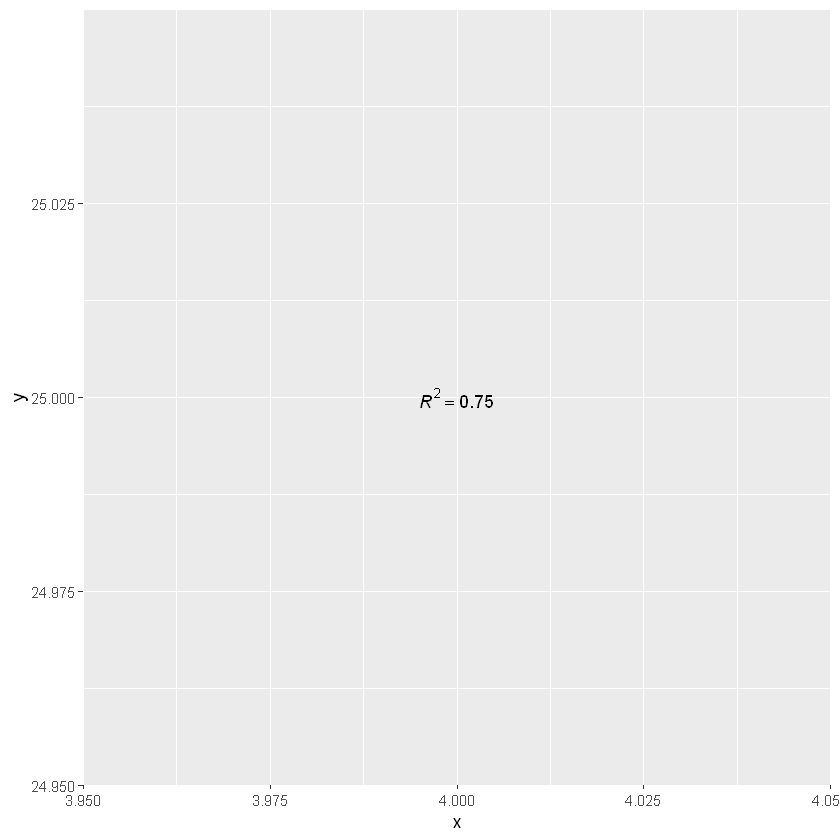

In [125]:
ggplot() + 
annotate("text", x = 4, y = 25, label = "italic(R) ^ 2 == 0.75",parse = TRUE)

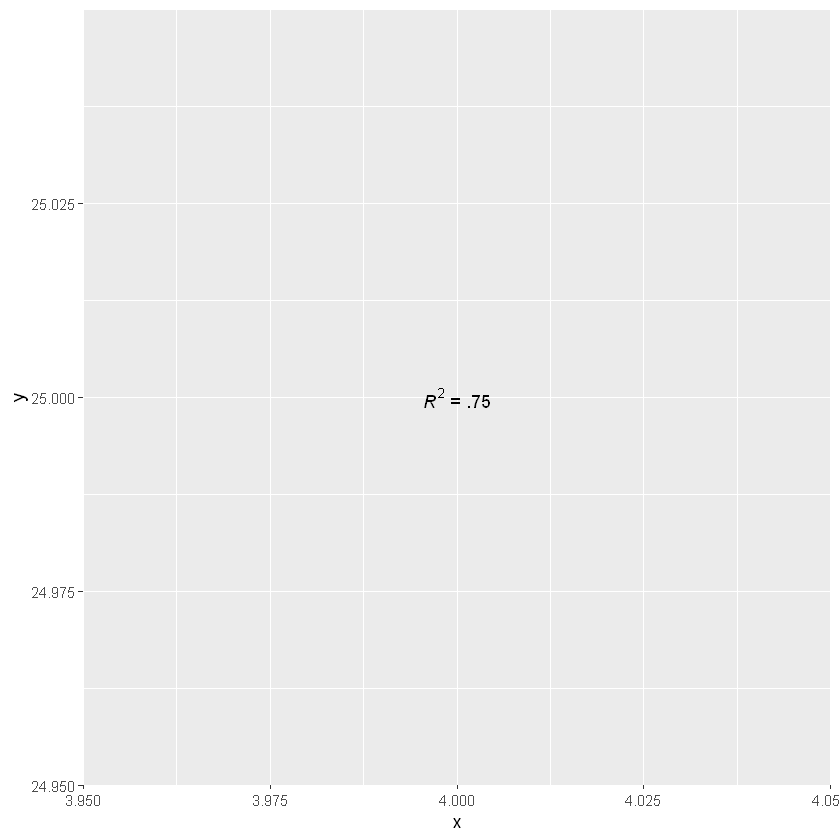

In [126]:
ggplot() + annotate("text", x = 4, y = 25, label = "paste(italic(R) ^ 2, \" = .75\")", parse = TRUE)